In [1]:
import collections
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, ttest_ind as ttest, ttest_ind_from_stats as ttest_stats
from scipy.optimize import curve_fit

def linear(x, slope, intercept):
    return np.poly1d([slope, intercept])(x)

In [2]:
# Unsized times

path1 = "/home/jonathan/Documents/coq/Field_theory/times1.csv"
path2 = "/home/jonathan/Documents/coq/Field_theory/times2.csv"
path3 = "/home/jonathan/Documents/coq/Field_theory/times3.csv"
path4 = "/home/jonathan/Documents/coq/Field_theory/times4.csv"
path5 = "/home/jonathan/Documents/coq/Field_theory/times5.csv"

coqc = [19.63, 19.72, 19.43, 19.57, 19.56]
coqc_mean = np.mean(coqc)
coqc_std = np.std(coqc)
totals = collections.defaultdict(lambda : (0., 0.))

with open(path1) as file1, open(path2) as file2, open(path3) as file3, open(path4) as file4, open(path5) as file5:
    reader1 = csv.reader(file1)
    reader2 = csv.reader(file2)
    reader3 = csv.reader(file3)
    reader4 = csv.reader(file4)
    reader5 = csv.reader(file5)
    for (row1, row2, row3, row4, row5) in zip(reader1, reader2, reader3, reader4, reader5):
        name = row1[0]
        times = [float(row1[1]), float(row2[1]), float(row3[1]), float(row4[1]), float(row5[1])]
        mean = np.mean(times) / 100
        std = np.std(times) / 100
        total_mean, total_std = totals[name]
        totals[name] = (total_mean + mean, total_std + std)
        
def percoqc(t, δt):
    percent = t / coqc_mean
    unc = np.abs(percent) * np.sqrt(np.power(δt / t, 2) + np.power(coqc_std / coqc_mean, 2))
    return (percent * 100, unc * 100)

totals["infer+"] = (totals['infer'][0] + totals['infer_type'][0] + totals['check_with_type'][0],
                    totals['infer'][1] + totals['infer_type'][1] + totals['check_with_type'][1])
totals["solve+"] = (totals['solve'][0] + totals['RecCheck'][0],
                    totals['solve'][1] + totals['RecCheck'][1])

totals_percent = {}
for k in totals:
    if totals[k][0] != 0:
        totals_percent[k] = percoqc(totals[k][0], totals[k][1])

# print(list(totals))
print(f"Unsized total `coqc` time: \t\t\t{coqc_mean : >2.4f} ± {coqc_std : 1.4f}")
print(f"`infer`, `infer_type`, `check_with_type`: \t{totals['infer+'][0] : 2.4f} ± {totals['infer+'][1] : 1.4f}\t"
      f"{totals_percent['infer+'][0] : >2.2f} ± {totals_percent['infer+'][1] : 2.2f}")
print(f"`solve`, `RecCheck`: \t\t\t\t{totals['solve+'][0] : 2.4f} ± {totals['solve+'][1] : 1.4f}\t"
      f"{totals_percent['solve+'][0] : 2.2f} ± {totals_percent['solve+'][1] : 2.2f}")
print(f"`foldmap_annots`: \t\t\t\t{totals['foldmap'][0] : 2.4f} ± {totals['foldmap'][1] : 1.4f}\t"
      f"{totals_percent['foldmap'][0] : 2.2f} ± {totals_percent['foldmap'][1] : 2.2f}")
print(f"`State`: \t\t\t\t\t{totals['state'][0] : 2.4f} ± {totals['state'][1] : 1.4f}\t"
      f"{totals_percent['state'][0] : 2.2f} ± {totals_percent['state'][1] : 2.2f}")
print(f"`Constraints`: \t\t\t\t\t{totals['constraints'][0] : 2.4f} ± {totals['constraints'][1] : 1.4f}\t"
      f"{totals_percent['constraints'][0] : 2.2f} ± {totals_percent['constraints'][1] : 2.2f}")

Unsized total `coqc` time: 			19.5820 ±  0.0950
`infer`, `infer_type`, `check_with_type`: 	 6.3963 ±  0.0507	32.66 ±  0.30
`solve`, `RecCheck`: 				 0.0620 ±  0.0019	 0.32 ±  0.01
`foldmap_annots`: 				 0.3480 ±  0.0025	 1.78 ±  0.02
`State`: 					 0.1828 ±  0.0015	 0.93 ±  0.01
`Constraints`: 					 0.3131 ±  0.0022	 1.60 ±  0.01


In [3]:
### Sized times

path = "/home/jonathan/Documents/coq/Field_theory_sized/vars-cstrnts.csv"
path1 = "/home/jonathan/Documents/coq/Field_theory_sized/times1.csv"
path2 = "/home/jonathan/Documents/coq/Field_theory_sized/times2.csv"
path3 = "/home/jonathan/Documents/coq/Field_theory_sized/times3.csv"
path4 = "/home/jonathan/Documents/coq/Field_theory_sized/times4.csv"
path5 = "/home/jonathan/Documents/coq/Field_theory_sized/times5.csv"

variables = []
constraints = []
means = []
stds = []
coqc = [280.93, 281.33, 282.23, 281.94, 281.89]
coqc_mean = np.mean(coqc)
coqc_std = np.std(coqc)
totals = collections.defaultdict(lambda : (0., 0.))

with open(path) as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] == "solve":
            variables.append(float(row[1]))
            constraints.append(float(row[2]))

with open(path1) as file1, open(path2) as file2, open(path3) as file3, open(path4) as file4, open(path5) as file5:
    reader1 = csv.reader(file1)
    reader2 = csv.reader(file2)
    reader3 = csv.reader(file3)
    reader4 = csv.reader(file4)
    reader5 = csv.reader(file5)
    for (row1, row2, row3, row4, row5) in zip(reader1, reader2, reader3, reader4, reader5):
        name = row1[0]
        times = [float(row1[1]), float(row2[1]), float(row3[1]), float(row4[1]), float(row5[1])]
        mean = np.mean(times) / 100
        std = np.std(times) / 100
        total_mean, total_std = totals[name]
        totals[name] = (total_mean + mean, total_std + std)
        if name == "solve":
            means.append(mean)
            stds.append(std)

def percoqc(t, δt):
    percent = t / coqc_mean
    unc = np.abs(percent) * np.sqrt(np.power(δt / t, 2) + np.power(coqc_std / coqc_mean, 2))
    return (percent * 100, unc * 100)

totals["infer+"] = (totals['infer'][0] + totals['infer_type'][0] + totals['check_with_type'][0],
                    totals['infer'][1] + totals['infer_type'][1] + totals['check_with_type'][1])
totals["solve+"] = (totals['solve'][0] + totals['RecCheck'][0],
                    totals['solve'][1] + totals['RecCheck'][1])

totals_percent = {}
for k in totals:
    if totals[k][0] != 0:
        totals_percent[k] = percoqc(totals[k][0], totals[k][1])

# print(list(totals))
print(f"Unsized total `coqc` time: \t\t\t{coqc_mean : >2.4f} ± {coqc_std : 1.4f}")
print(f"`infer`, `infer_type`, `check_with_type`: \t{totals['infer+'][0] : 2.4f} ± {totals['infer+'][1] : 1.4f}\t"
      f"{totals_percent['infer+'][0] : >2.2f} ± {totals_percent['infer+'][1] : 2.2f}")
print(f"`solve`, `RecCheck`: \t\t\t\t{totals['solve+'][0] : 2.4f} ± {totals['solve+'][1] : 1.4f}\t"
      f"{totals_percent['solve+'][0] : >2.2f} ± {totals_percent['solve+'][1] : 2.2f}")
print(f"`foldmap_annots`: \t\t\t\t{totals['foldmap'][0] : 2.4f} ± {totals['foldmap'][1] : 1.4f}\t"
      f"{totals_percent['foldmap'][0] : >2.2f} ± {totals_percent['foldmap'][1] : 2.2f}")
print(f"`State`: \t\t\t\t\t{totals['state'][0] : 2.4f} ± {totals['state'][1] : 1.4f}\t"
      f"{totals_percent['state'][0] : 2.2f} ± {totals_percent['state'][1] : 2.2f}")
print(f"`Constraints`: \t\t\t\t\t{totals['constraints'][0] : 2.4f} ± {totals['constraints'][1] : 1.4f}\t"
      f"{totals_percent['constraints'][0] : 2.2f} ± {totals_percent['constraints'][1] : 2.2f}")

Unsized total `coqc` time: 			281.6640 ±  0.4686
`infer`, `infer_type`, `check_with_type`: 	 268.0367 ±  0.6541	95.16 ±  0.28
`solve`, `RecCheck`: 				 183.5061 ±  0.4740	65.15 ±  0.20
`foldmap_annots`: 				 40.7738 ±  0.0838	14.48 ±  0.04
`State`: 					 27.8072 ±  0.1463	 9.87 ±  0.05
`Constraints`: 					 7.9195 ±  0.0373	 2.81 ±  0.01


In [4]:
unsized = [19.63, 19.72, 19.43, 19.57, 19.56]
sized = [280.93, 281.33, 282.23, 281.94, 281.89]
tstat, pvalue = ttest(unsized, sized)
t_infer,       p_infer       = ttest_stats(6.3963, 0.0507, 5, 268.0367, 0.6541, 5)
t_solve,       p_solve       = ttest_stats(0.0620, 0.0019, 5, 183.5061, 0.4740, 5)
t_foldmap,     p_foldmap     = ttest_stats(0.3480, 0.0025, 5, 40.7738, 0.0838, 5)
t_state,       p_state       = ttest_stats(0.1828, 0.0015, 5, 27.8072, 0.1463, 5)
t_constraints, p_constraints = ttest_stats(0.3131, 0.0022, 5, 7.9195, 0.0373, 5)
print(f"Total:       t = {tstat};         p = {pvalue}")
print(f"infer:       t = {t_infer};       p = {p_infer}")
print(f"solve:       t = {t_solve};       p = {p_solve}")
print(f"foldmap:     t = {t_foldmap};     p = {p_foldmap}")
print(f"State:       t = {t_state};       p = {p_state}")
print(f"Constraints: t = {t_constraints}; p = {p_constraints}")

Total:       t = -1096.2991488147861;         p = 5.367536427912824e-22
infer:       t = -891.7537558588509;       p = 2.800546041668547e-21
solve:       t = -865.3801314395783;       p = 3.560786724219704e-21
foldmap:     t = -1078.2176347330549;     p = 6.131345918350423e-22
State:       t = -422.19268487250207;       p = 1.1093337340271652e-18
Constraints: t = -455.1989300413256; p = 6.075021227530603e-19


Slope: 5.996094941002384e-07
Intercept: 0.00021993219572954118
r: 0.9953478792472695; R²: 0.9999999850548151
Reduced χ²: 19632.403311351067


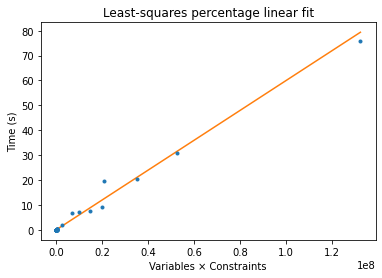

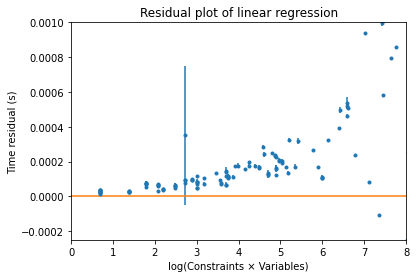

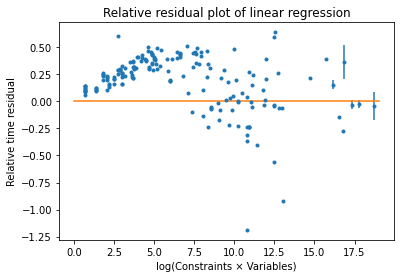

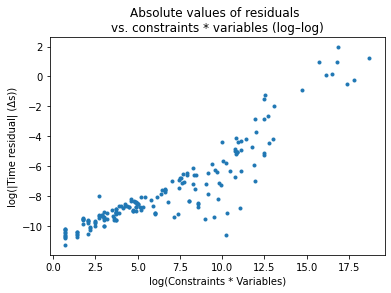

R² of log(|residuals|) to log(constraints * variables): 0.8213336465079254


In [32]:
# Plotting `solve` times against |constraints| × |variables|

times = np.array(means)
mean_time = np.mean(times)
vcs = np.array(variables) * np.array(constraints)
unc = np.array(stds)

# Least Squares Percentage Regression (https://doi.org/10.2139%2Fssrn.1406472)
# slope = (Σ(vcs/times)Σ(1/times²) - Σ(1/times)Σ(vcs/times²)) / (Σ(1/times²)Σ(vcs/times)² - (Σ(x/times²))²)
# intercept = (Σ(1/times) - slope * Σ(vcs/times²)) / Σ(1/times²)
slope = (np.sum(vcs/times) * np.sum(1/np.power(times, 2)) - np.sum(1/times) * np.sum(vcs/np.power(times, 2))) / (np.sum(1/np.power(times, 2)) * np.sum(np.power(vcs/times, 2)) - np.power(np.sum(vcs/np.power(times, 2)), 2))
intercept = (np.sum(1/times) - slope * np.sum(vcs/np.power(times, 2))) / np.sum(1/np.power(times, 2))

# Ordinary Least Squares Regression
# [slope, intercept], cov = curve_fit(linear, vcs, times, sigma = unc)
# [[slope_var, _], [_, intercept_var]] = cov

def model(x):
    return linear(x, slope, intercept)
residuals = times - model(vcs)

# R² = (Σ((ŷ-ȳ)/y)²) / (Σ((y-ȳ)/y)²)
Rsq = np.sum([np.power((model(vc) - mean_time) / time, 2) for (vc, time) in zip(vcs, times)]) / np.sum([np.power((time - mean_time) / time, 2) for time in times])
chisq = np.power(residuals / unc, 2).sum() / (len(vcs) - 2)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"r: {pearsonr(vcs, times)[0]}; R²: {Rsq}")
print(f"Reduced χ²: {chisq}")

vcs_space = np.linspace(0, max(vcs), 128)
plt.errorbar(vcs, times, yerr = unc, fmt = ".")
plt.plot(vcs_space, model(vcs_space), "-")
plt.title("Least-squares percentage linear fit")
plt.xlabel("Variables × Constraints")
plt.ylabel("Time (s)")
plt.show()

_vcs = [vc for vc in vcs if vc > 0]
_times = [t for (t, vc) in zip(times, vcs) if vc > 0]
_residuals = [r for (r, vc) in zip(residuals, vcs) if vc > 0]
_unc = [u for (u, vc) in zip(unc, vcs) if vc > 0]
_vcs_space = np.linspace(0, round(max(np.log(_vcs))), 128)

plt.errorbar(np.log(_vcs), _residuals, yerr = _unc, fmt = ".")
plt.plot(_vcs_space, np.zeros(128), "-")
plt.xlim(0, 8)
plt.ylim(-0.00025, 0.001)
plt.title("Residual plot of linear regression")
plt.xlabel("log(Variables × Constraints)")
plt.ylabel("Time residual (s)")
plt.show()

plt.errorbar(np.log(_vcs), np.divide(_residuals, _times), yerr = _unc, fmt = ".")
plt.plot(_vcs_space, np.zeros(128), "-")
plt.title("Relative residual plot of linear regression")
plt.xlabel("log(Variables × Constraints)")
plt.ylabel("Relative time residual")
plt.show()

plt.plot(np.log(_vcs), np.log(np.abs(_residuals)), ".")
plt.title("Absolute values of residuals \nvs. constraints * variables (log–log)")
plt.xlabel("log(Variables × Constraints)")
plt.ylabel("log(|Time residual| (Δs))")
plt.show()

print(f"R² of log(|residuals|) to log(constraints * variables): {np.power(pearsonr(np.log(_vcs), np.log(np.abs(_residuals)))[0], 2)}")

[(444000.0, 750.0, 592.0), (470344.0, 908.0, 518.0), (2492503.0, 1759.0, 1417.0), (6821437.0, 3017.0, 2261.0), (10143513.0, 3303.0, 3071.0), (14866852.0, 4108.0, 3619.0), (19966966.0, 4663.0, 4282.0), (20682707.0, 4973.0, 4159.0), (35137152.0, 6778.0, 5184.0), (52702976.0, 7936.0, 6641.0), (132365910.0, 13197.0, 10030.0)]


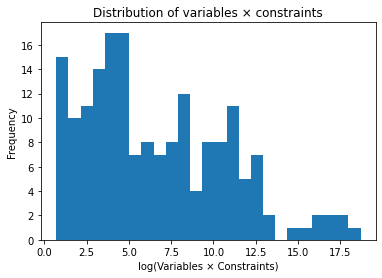

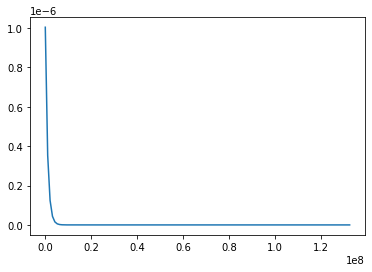

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0000000] [loc=996816.186 scale=8633964.676]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000000] [loc=0.000 scale=996816.186]
[distfit] >[pareto    ] [0.04 sec] [RSS: 0.0000000] [loc=-2.515 scale=2.515]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 0.0000000] [loc=0.000 scale=525062.090]
[distfit] >[t         ] [0.05 sec] [RSS: 0.0000000] [loc=-0.000 scale=0.000]
[distfit] >[genextreme] [0.17 sec] [RSS: 0.0000000] [loc=3.249 scale=18.192]
[distfit] >[gamma     ] [0.05 sec] [RSS: 0.0000000] [loc=-0.000 scale=67358597.130]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.0000000] [loc=-0.000 scale=104633.020]
[distfit] >[beta      ] [0.10 sec] [RSS: 0.0000000] [loc=-0.000 scale=667922953.792]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0000000] [loc=0.000 scale=132365910.000]
[distfit] >[loggamma  ] [0.07 sec] [RSS: 0.0000000] [loc=-5799241215.811 scale=686157313.043]
[distfit] >Compute confidence interval [parametric]

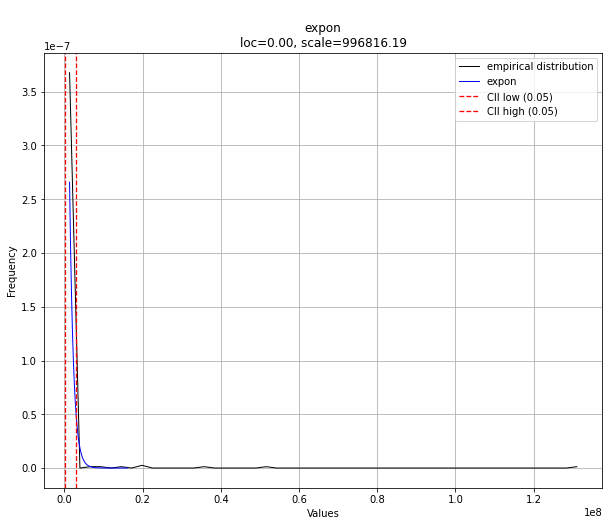

         distr score  LLE                loc             scale  \
0        expon   0.0  NaN                0.0     996816.186047   
1     dweibull   0.0  NaN                0.0     525062.089922   
2      lognorm   0.0  NaN               -0.0     104633.020271   
3         norm   0.0  NaN      996816.186047    8633964.676206   
4     loggamma   0.0  NaN -5799241215.810551  686157313.042676   
5        gamma   0.0  NaN               -0.0   67358597.130408   
6         beta   0.0  NaN               -0.0  667922953.791681   
7       pareto   0.0  NaN          -2.515284          2.515284   
8   genextreme   0.0  NaN           3.248774         18.191874   
9      uniform   0.0  NaN                0.0       132365910.0   
10           t   0.0  NaN               -0.0               0.0   

                                         arg  
0                                         ()  
1                      (0.4082855027967782,)  
2                       (7.147202038196369,)  
3                  

In [34]:
from distfit import distfit
from scipy.stats import pareto, expon

print(sorted([(vc, v, c) for (vc, v, c) in zip(vcs, np.array(variables), np.array(constraints)) if np.log(vc) > 13]))

plt.hist([np.log(vc) for vc in vcs if vc > 0], 25)
plt.title("Distribution of variables × constraints")
plt.xlabel("log(Variables × Constraints)")
plt.ylabel("Frequency")
plt.show()

loc, scale = expon.fit(vcs)
x = np.linspace(0, max(vcs), 128)
plt.plot(x, expon.pdf(x, loc, scale))
plt.show()

# https://erdogant.github.io/distfit/pages/html/Performance.html#probability-density-function-fitting
dist = distfit()
dist.fit_transform(vcs)
dist.plot()
print(dist.summary)
print(dist.model)

R²: 0.9942980658581727
Slope: 0.8761406395958589
Intercept: 0.39293780798146655
Reduced χ²: 0.09408623057390533


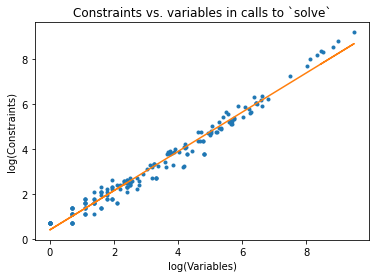

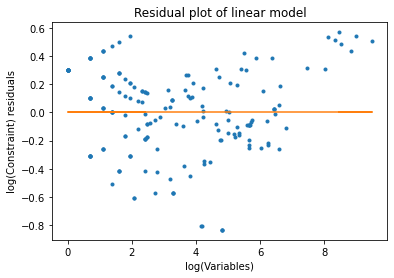

In [19]:
# Plotting constraints against variables

_variables = [v for (v, c) in zip(variables, constraints) if v > 0 and c > 0]
_constraints = [c for (v, c) in zip(variables, constraints) if v > 0 and c > 0]

[slope, intercept], _ = curve_fit(linear, np.log(_variables), np.log(_constraints))

def vcmodel(x):
    return linear(x, slope, intercept)
residuals = np.log(_constraints) - vcmodel(np.log(_variables))
chisq = np.power(residuals, 2).sum() / (len(_variables) - 2)

print("R²: {0}".format(np.power(pearsonr(variables, constraints)[0], 2)))
print("Slope: {0}".format(slope))
print("Intercept: {0}".format(intercept))
print("Reduced χ²: {0}".format(chisq))

plt.plot(np.log(_variables), np.log(_constraints), ".", np.log(_variables), vcmodel(np.log(_variables)))
plt.title("Constraints vs. variables in calls to `solve`")
plt.xlabel("log(Variables)")
plt.ylabel("log(Constraints)")
plt.show()

plt.plot(np.log(_variables), residuals, ".", np.log(_variables), np.zeros(len(_variables)), "-")
plt.title("Residual plot of linear model")
plt.xlabel("log(Variables)")
plt.ylabel("log(Constraint) residuals")
plt.show()

χ² (power): 1451892.3042396684
χ² (exponential): 85354359.19254388
Power      : constraints * variables =  29.47 * n^ 3.6460 +  2006.70
Exponential: constraints * variables =  13763.60 *  1.2860^n + -31351.31


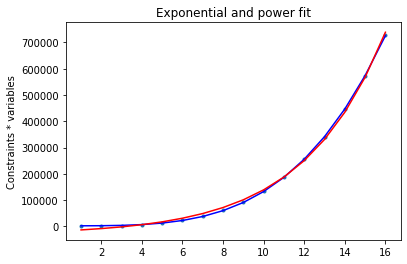

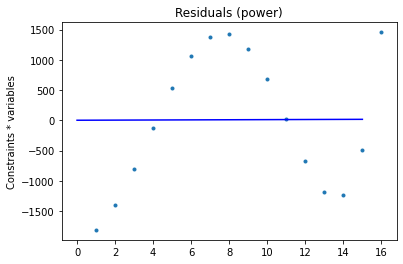

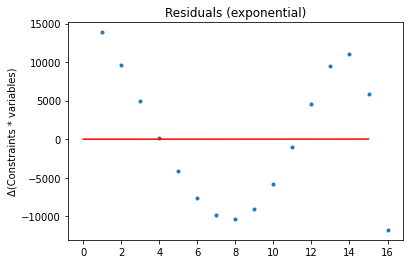

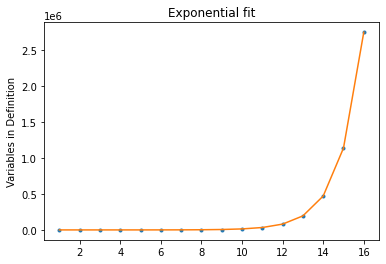

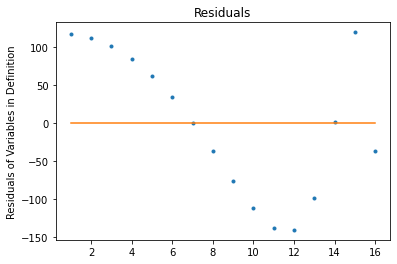

In [7]:
# Plotting constraints and variables involved in the following definitions:

'''
Unset Guard Checking.
Set Sized Typing.
Set Profiling.
Time Definition natConst (n m : nat) := n.
Time Definition natEq1  (n m : nat) : natConst n m = natConst n m := eq_refl.
Time Definition natEq2  (n m : nat) : natEq1  n m = natEq1  n m := eq_refl.
Time Definition natEq3  (n m : nat) : natEq2  n m = natEq2  n m := eq_refl.
Time Definition natEq4  (n m : nat) : natEq3  n m = natEq3  n m := eq_refl.
Time Definition natEq5  (n m : nat) : natEq4  n m = natEq4  n m := eq_refl.
Time Definition natEq6  (n m : nat) : natEq5  n m = natEq5  n m := eq_refl.
Time Definition natEq7  (n m : nat) : natEq6  n m = natEq6  n m := eq_refl.
Time Definition natEq8  (n m : nat) : natEq7  n m = natEq7  n m := eq_refl.
Time Definition natEq9  (n m : nat) : natEq8  n m = natEq8  n m := eq_refl.
Time Definition natEq10 (n m : nat) : natEq9  n m = natEq9  n m := eq_refl.
Time Definition natEq11 (n m : nat) : natEq10 n m = natEq10 n m := eq_refl.
Time Definition natEq12 (n m : nat) : natEq11 n m = natEq11 n m := eq_refl.
Time Definition natEq13 (n m : nat) : natEq12 n m = natEq12 n m := eq_refl.
Time Definition natEq14 (n m : nat) : natEq13 n m = natEq13 n m := eq_refl.
Time Definition natEq15 (n m : nat) : natEq14 n m = natEq14 n m := eq_refl.
Time Definition natEq16 (n m : nat) : natEq15 n m = natEq15 n m := eq_refl.
'''

# These are constraints and variables involved in each call to `solve`
constraints = np.array([16,36,64,100,144,196,256,324,400,484,576,676,784,900,1024,1156])
variables = np.array([14,27,44,65,90,119,152,189,230,275,324,377,434,495,560,629])
cv = constraints * variables
xs = np.array(range(0, len(constraints))) + 1

def pwr(x, a, b, c):
    return np.add(np.multiply(a, np.power(x, b)), c)

def exp(x, d, e, f):
    return np.add(np.multiply(d, np.power(e, x)), f)

[a, b, c], _ = curve_fit(pwr, xs, cv)
[d, e, f], _ = curve_fit(exp, xs, cv)

def model1(x):
    return pwr(x, a, b, c)

def model2(x):
    return exp(x, d, e, f)

residuals1 = cv - model1(xs)
residuals2 = cv - model2(xs)
chisq1 = np.power(residuals1, 2).sum() / (len(xs) - 3)
chisq2 = np.power(residuals2, 2).sum() / (len(xs) - 3)

print(f"χ² (power): {chisq1}")
print(f"χ² (exponential): {chisq2}")
print(f"Power      : constraints * variables = {a : 2.2f} * n^{b : 1.4f} + {c : 4.2f}")
print(f"Exponential: constraints * variables = {d : 4.2f} * {e : 1.4f}^n + {f : 5.2f}")

plt.plot(xs, cv, ".", xs, model1(xs), "-b", xs, model2(xs), "-r")
plt.title("Exponential and power fit")
plt.ylabel("Constraints * variables")
plt.show()

plt.plot(xs, residuals1, ".", xs, "-b")
plt.title("Residuals (power)")
plt.ylabel("Constraints * variables")
plt.show()

plt.plot(xs, residuals2, ".", xs, "-r")
plt.title("Residuals (exponential)")
plt.ylabel("Δ(Constraints * variables)")
plt.show()

# These are total numbers of variables required for each definition use
allvars = [4, 6, 12, 36, 112, 322, 864, 2216, 5532, 13598, 33140, 80396, 194568, 470298, 1136072, 2743504]
[g, h, i], _ = curve_fit(exp, xs, allvars)

def model(x):
    return exp(x, g, h, i)

residuals = allvars - model(xs)
chisq = np.power(residuals, 2).sum() / (len(xs) - 3)
#print(f"χ²: {chisq}")

plt.plot(xs, allvars, ".", xs, model(xs), "-")
plt.title("Exponential fit")
plt.ylabel("Variables in Definition")
plt.show()

plt.plot(xs, residuals, ".", xs, np.zeros(len(xs)), "-")
plt.title("Residuals")
plt.ylabel("Residuals of Variables in Definition")
plt.show()

In [8]:
components = []

with open("/home/jonathan/Documents/coq/Field_theory_sized/components.csv") as file:
    reader = csv.reader(file, delimiter = " ")
    for row in reader:
        for comp in row:
            components.append(int(comp))

components_10s = []
components_50s = []
components_150s = []
components_1000s = []

for component in components:
    if component <= 10:
        components_10s.append(component)
    elif component <= 50:
        components_50s.append(component)
    elif component <= 150:
        components_150s.append(component)
    else:
        components_1000s.append(component)

print(f"Total: {len(components)}")
print(f"≤ 10: {len(components_10s)}")
print(f"≤ 50: {len(components_50s)}")
print(f"≤ 150: {len(components_150s)}")
print(f"< 150: {np.sort(components_1000s)}")


Total: 10335
≤ 10: 10085
≤ 50: 126
≤ 150: 106
< 150: [ 209  217  224  292  298  330  401  434  531  531  563  640  655  698
  792  846 1101 1130]
